In [1]:
import pandas as pd
import os
from ast import literal_eval
from tqdm import tqdm
import numpy as np

import seaborn as sns

In [2]:
def flatten(t):
    return [item for sublist in t for item in sublist]

In [3]:
DATA_PATH = os.path.join(
    '..', '..', '..', "data", "frameworks_data", 'data_v0.7.1'
)
RELABELED_DATA_PATH = os.path.join(
    DATA_PATH, 'relabeled_data'
)

In [4]:
full_data = pd.read_csv(os.path.join(DATA_PATH, 'full_dataset_with_translations.csv'))
test_data = pd.read_csv(os.path.join(DATA_PATH, 'test_v0.7.1.csv'))

keyword_affected = pd.concat([
    pd.read_csv(os.path.join(RELABELED_DATA_PATH, 'train_0.7.1_keyword_affected_groups_level_3.csv')),
    pd.read_csv(os.path.join(RELABELED_DATA_PATH, 'val_0.7.1_keyword_affected_groups_level_3.csv'))
])
keyword_age = pd.concat([
    pd.read_csv(os.path.join(RELABELED_DATA_PATH, 'train_0.7.1_keyword_age.csv')),
    pd.read_csv(os.path.join(RELABELED_DATA_PATH, 'val_0.7.1_keyword_age.csv'))
])
keyword_gender = pd.concat([
    pd.read_csv(os.path.join(RELABELED_DATA_PATH, 'train_0.7.1_keyword_gender.csv')),
    pd.read_csv(os.path.join(RELABELED_DATA_PATH, 'val_0.7.1_keyword_gender.csv'))
])
keyword_specific_needs_groups = pd.concat([
    pd.read_csv(os.path.join(RELABELED_DATA_PATH, 'train_0.7.1_keyword_specific_needs_groups.csv')),
    pd.read_csv(os.path.join(RELABELED_DATA_PATH, 'val_0.7.1_keyword_specific_needs_groups.csv'))
])

/home/selim/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
full_data = pd.merge(
    right=full_data,
    left=keyword_affected,
    on='entry_id',
    how='right'
)
full_data = pd.merge(
    right=full_data,
    left=keyword_age,
    on='entry_id',
    how='right'
)
full_data = pd.merge(
    right=full_data,
    left=keyword_gender,
    on='entry_id',
    how='right'
)
full_data = pd.merge(
    right=full_data,
    left=keyword_specific_needs_groups,
    on='entry_id',
    how='right'
)

In [6]:
full_data = full_data.drop(columns=[
    'age', 'gender', 'specific_needs_groups', 'affected_groups_level_0',
       'affected_groups_level_1', 'affected_groups_level_2',
       'affected_groups_level_3']).\
        rename(columns={'specific_needs_groups_kw': 'specific_needs_groups',
                        'gender_kw_pred': 'gender', 'age_kw_pred': 'age',
                        'affected_groups_level_3_kw': 'affected_groups'
                       })

In [7]:
full_data.columns

Index(['entry_id', 'specific_needs_groups', 'gender', 'age', 'affected_groups',
       'excerpt', 'analysis_framework_id', 'lead_id', 'project_id', 'verified',
       'sectors', 'subpillars_2d', 'subpillars_1d', 'geo_location', 'severity',
       'info_date', 'reliability', 'source_type', 'url', 'website', 'lang',
       'translation_en', 'translation_fr', 'translation_es'],
      dtype='object')

In [8]:
full_data['sectors'] = full_data.sectors.apply(
    lambda x: [item for item in literal_eval(x) if item !='NOT_MAPPED']
)
full_data['subpillars_2d'] = full_data.subpillars_2d.apply(
    lambda x: [item for item in literal_eval(x) if item !='NOT_MAPPED']
)
full_data['subpillars_1d'] = full_data.subpillars_1d.apply(
    lambda x: [item for item in literal_eval(x) if item !='NOT_MAPPED']
)
full_data['pillars_1d'] = full_data.subpillars_1d.apply(
    lambda x: list(np.unique([item.split('->')[0] for item in x]))
               )
full_data['pillars_2d'] = full_data.subpillars_2d.apply(
    lambda x: list(np.unique([item.split('->')[0] for item in x]))
               )

In [9]:
#full_data['subpillars']

In [10]:
all_pillars_2d = list(np.unique(flatten(full_data['pillars_2d'])))
all_pillars_1d = list(np.unique(flatten(full_data['pillars_1d'])))
all_pillars = all_pillars_2d + all_pillars_1d
all_pillars_2d, all_pillars_1d, all_pillars

(['At Risk',
  'Capacities & Response',
  'Humanitarian Conditions',
  'Impact',
  'Priority Interventions',
  'Priority Needs'],
 ['Casualties',
  'Context',
  'Covid-19',
  'Displacement',
  'Humanitarian Access',
  'Information And Communication',
  'Shock/Event'],
 ['At Risk',
  'Capacities & Response',
  'Humanitarian Conditions',
  'Impact',
  'Priority Interventions',
  'Priority Needs',
  'Casualties',
  'Context',
  'Covid-19',
  'Displacement',
  'Humanitarian Access',
  'Information And Communication',
  'Shock/Event'])

In [11]:
"""full_data['sectors_pillars_2d'] = full_data.apply(
    lambda x: flatten(
        [[f"{level0}->{item}" for item in x[level0]] for level0 in ['sectors', 'pillars_2d']
    ]), axis=1
)"""

'full_data[\'sectors_pillars_2d\'] = full_data.apply(\n    lambda x: flatten(\n        [[f"{level0}->{item}" for item in x[level0]] for level0 in [\'sectors\', \'pillars_2d\']\n    ]), axis=1\n)'

In [12]:
#full_data['sectors_pillars_2d']

In [13]:
#prop of positive examples in that
#full_data['present_prim_tags'].apply(lambda x: len(x)>0).sum() / full_data.shape[0]

In [14]:
#full_data['present_prim_tags'].head()

In [15]:
"""full_data['subpillars_1d_part1'] = full_data.subpillars_1d.apply(
    lambda x: [
        item for item in x if item.split('->')[0] in [
            'Displacement',
             'Context',
        ]
    ]
)

full_data['subpillars_1d_part2'] = full_data.subpillars_1d.apply(
    lambda x: [
        item for item in x if item.split('->')[0] in [
            'Shock/Event',   
            'Humanitarian Access',
            'Casualties'
        ]
    ]
)

full_data['subpillars_1d_part3'] = full_data.subpillars_1d.apply(
    lambda x: [
        item for item in x if item.split('->')[0] in [
            'Covid-19', 
            'Information And Communication',
        ]
    ]
)
"""

"full_data['subpillars_1d_part1'] = full_data.subpillars_1d.apply(\n    lambda x: [\n        item for item in x if item.split('->')[0] in [\n            'Displacement',\n             'Context',\n        ]\n    ]\n)\n\nfull_data['subpillars_1d_part2'] = full_data.subpillars_1d.apply(\n    lambda x: [\n        item for item in x if item.split('->')[0] in [\n            'Shock/Event',   \n            'Humanitarian Access',\n            'Casualties'\n        ]\n    ]\n)\n\nfull_data['subpillars_1d_part3'] = full_data.subpillars_1d.apply(\n    lambda x: [\n        item for item in x if item.split('->')[0] in [\n            'Covid-19', \n            'Information And Communication',\n        ]\n    ]\n)\n"

In [16]:
"""full_data['subpillars_2d_part1'] = full_data.subpillars_2d.apply(
    lambda x: [
        item for item in x if item.split('->')[0] in [
            'Humanitarian Conditions',
             'Impact',
            'At Risk',
        ]
    ]
)

full_data['subpillars_2d_part2'] = full_data.subpillars_2d.apply(
    lambda x: [
        item for item in x if item.split('->')[0] in [
            'Capacities & Response',
            'Priority Interventions',  
            'Priority Needs', 
        ]
    ]
)
"""

"full_data['subpillars_2d_part1'] = full_data.subpillars_2d.apply(\n    lambda x: [\n        item for item in x if item.split('->')[0] in [\n            'Humanitarian Conditions',\n             'Impact',\n            'At Risk',\n        ]\n    ]\n)\n\nfull_data['subpillars_2d_part2'] = full_data.subpillars_2d.apply(\n    lambda x: [\n        item for item in x if item.split('->')[0] in [\n            'Capacities & Response',\n            'Priority Interventions',  \n            'Priority Needs', \n        ]\n    ]\n)\n"

In [17]:
"""print('subpillars_1d_first_part',
    len(list(set(flatten(full_data.subpillars_1d_part1)))),
      '\nsubpillars_1d_second_part',
      len(list(set(flatten(full_data.subpillars_1d_part2)))),
      '\nsubpillars_1d_third_part',
      len(list(set(flatten(full_data.subpillars_1d_part3)))),
      '\nsubpillars_2d_first_part',
      len(list(set(flatten(full_data.subpillars_2d_part1)))),
      '\nsubpillars_2d_second_part',
      len(list(set(flatten(full_data.subpillars_2d_part2))))
)"""

"print('subpillars_1d_first_part',\n    len(list(set(flatten(full_data.subpillars_1d_part1)))),\n      '\nsubpillars_1d_second_part',\n      len(list(set(flatten(full_data.subpillars_1d_part2)))),\n      '\nsubpillars_1d_third_part',\n      len(list(set(flatten(full_data.subpillars_1d_part3)))),\n      '\nsubpillars_2d_first_part',\n      len(list(set(flatten(full_data.subpillars_2d_part1)))),\n      '\nsubpillars_2d_second_part',\n      len(list(set(flatten(full_data.subpillars_2d_part2))))\n)"

[0, 1, 2, 3, 4]


Text(0.5, 1.0, '1d subpillars')

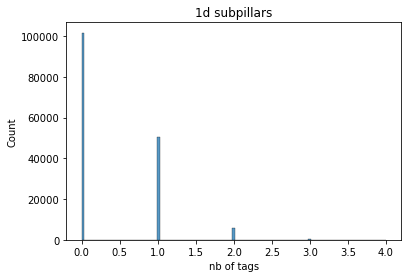

In [18]:
import matplotlib.pyplot as plt
flat_results = full_data.pillars_1d.apply(lambda x: len(x))
print(list(set(flat_results)))
sns.histplot(x=flat_results)
plt.xlabel('nb of tags')
plt.title('1d subpillars')

[0, 1, 2, 3, 4, 5]


Text(0.5, 1.0, '2d subpillars')

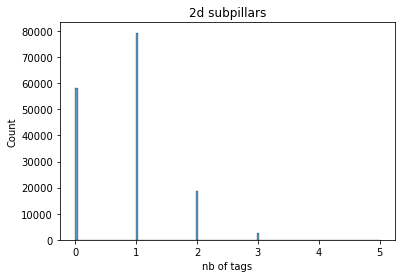

In [19]:
flat_results = full_data.pillars_2d.apply(lambda x: len(x))
print(list(set(flat_results)))
sns.histplot(x=flat_results)
plt.xlabel('nb of tags')
plt.title('2d subpillars')

['Information And Communication', 'Displacement', 'Context', 'Shock/Event', 'Casualties', 'Humanitarian Access', 'Covid-19']


<AxesSubplot:xlabel='Count'>

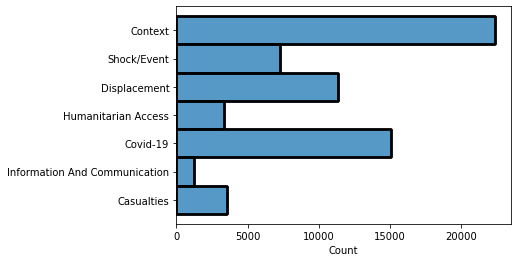

In [20]:
flat_results = flatten(full_data['pillars_1d'])
print(list(set(flat_results)))
sns.histplot(y=flat_results)

['Priority Needs', 'Impact', 'Capacities & Response', 'Humanitarian Conditions', 'Priority Interventions', 'At Risk']


<AxesSubplot:xlabel='Count'>

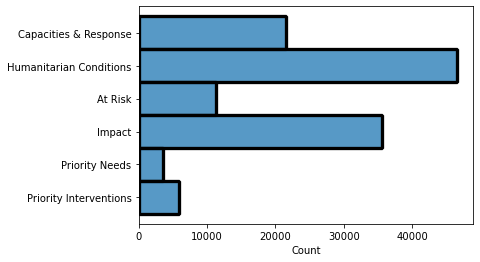

In [21]:
flat_results = flatten(full_data['pillars_2d'])
print(list(set(flat_results)))
sns.histplot(y=flat_results)

In [22]:
"""full_data['subpillars_2d_part1'] = full_data.subpillars_2d.apply(
    lambda x: [
        item for item in x if item in [
            'Humanitarian Conditions->Living Standards',
             'Humanitarian Conditions->Physical And Mental Well Being',
             'Impact->Impact On Systems, Services And Networks',
             'Capacities & Response->International Response',
             'Impact->Driver/Aggravating Factors',
             'Impact->Impact On People',
             'At Risk->Risk And Vulnerabilities'
        ]
    ]
)"""

"full_data['subpillars_2d_part1'] = full_data.subpillars_2d.apply(\n    lambda x: [\n        item for item in x if item in [\n            'Humanitarian Conditions->Living Standards',\n             'Humanitarian Conditions->Physical And Mental Well Being',\n             'Impact->Impact On Systems, Services And Networks',\n             'Capacities & Response->International Response',\n             'Impact->Driver/Aggravating Factors',\n             'Impact->Impact On People',\n             'At Risk->Risk And Vulnerabilities'\n        ]\n    ]\n)"

In [23]:
def custom_eval(x):
    if str(x)=='nan':
        return []
    if str(x)=='[None]':
        return []
    if type(x)==list:
        return x
    else:
        return literal_eval(x)
    
#full_data['affected_groups'] = full_data['affected_groups_level_0']

In [24]:
"""affected_groups_level_2_3_merger = {
    'Asylum Seekers': 'Displaced->Asylum Seekers', 
    'Host': 'Non Displaced->Host', 
    'Non Host': 'Non Displaced->Non Host',
    'IDP': 'Displaced->IDP', 
    'In Transit': 'NOT_MAPPED', 
    'Migrants': 'Displaced->Migrants',
    'NOT_MAPPED': 'NOT_MAPPED',
    'Others of Concern': 'NOT_MAPPED', 
    'Pendular': 'NOT_MAPPED',
    'Permanent': 'NOT_MAPPED', 
    'Refugees': 'Displaced->Refugees', 
    'Returnees': 'Displaced->Returnees', 
    'Stateless': 'Displaced->Stateless'
}
full_data['affected_groups'] = full_data['affected_groups'].\
apply(
    lambda x: [affected_groups_level_2_3_merger[item] for item in custom_eval(x)\
               if affected_groups_level_2_3_merger[item]!='NOT_MAPPED']
)"""

"affected_groups_level_2_3_merger = {\n    'Asylum Seekers': 'Displaced->Asylum Seekers', \n    'Host': 'Non Displaced->Host', \n    'Non Host': 'Non Displaced->Non Host',\n    'IDP': 'Displaced->IDP', \n    'In Transit': 'NOT_MAPPED', \n    'Migrants': 'Displaced->Migrants',\n    'NOT_MAPPED': 'NOT_MAPPED',\n    'Others of Concern': 'NOT_MAPPED', \n    'Pendular': 'NOT_MAPPED',\n    'Permanent': 'NOT_MAPPED', \n    'Refugees': 'Displaced->Refugees', \n    'Returnees': 'Displaced->Returnees', \n    'Stateless': 'Displaced->Stateless'\n}\nfull_data['affected_groups'] = full_data['affected_groups'].apply(\n    lambda x: [affected_groups_level_2_3_merger[item] for item in custom_eval(x)               if affected_groups_level_2_3_merger[item]!='NOT_MAPPED']\n)"

In [25]:
cols = ['gender', 'age',  'specific_needs_groups', 'severity', 'affected_groups']
for col in cols:
    full_data[col] = full_data[col].apply(
       lambda x: [f"{col}->{item}" for item in custom_eval(x) if item!='NOT_MAPPED']
    )

In [26]:
list(set(flatten(full_data.severity.tolist())))

['severity->Minor Problem',
 'severity->No problem',
 'severity->Critical',
 'severity->Of Concern',
 'severity->Major']

In [27]:
list(set(flatten(full_data.specific_needs_groups.tolist())))

['specific_needs_groups->Indigenous people',
 'specific_needs_groups->GBV survivors',
 'specific_needs_groups->Single Women (including Widows)',
 'specific_needs_groups->Persons with Disability',
 'specific_needs_groups->Pregnant or Lactating Women',
 'specific_needs_groups->Child Head of Household',
 'specific_needs_groups->Unaccompanied or Separated Children',
 'specific_needs_groups->Minorities',
 'specific_needs_groups->Chronically Ill',
 'specific_needs_groups->Elderly Head of Household',
 'specific_needs_groups->Female Head of Household',
 'specific_needs_groups->LGBTQI+']

In [28]:
list(set(flatten(full_data.age.tolist())))

['age->Infants/Toddlers (<5 years old)',
 'age->Children/Youth (5 to 17 years old)',
 'age->Older Persons (60+ years old)',
 'age->Adult (18 to 59 years old)']

In [29]:
list(set(flatten(full_data.gender.tolist())))

['gender->Male', 'gender->Female']

In [30]:
list(set(flatten(full_data.affected_groups.tolist())))

['affected_groups->Migrants',
 'affected_groups->Refugees',
 'affected_groups->IDP',
 'affected_groups->Host',
 'affected_groups->Asylum Seekers',
 'affected_groups->Returnees']

In [31]:
full_data['subpillars'] = full_data.apply(
    lambda x: x.subpillars_1d + x.subpillars_2d, axis=1
)

full_data['secondary_tags'] = full_data.apply(
    lambda x:x.severity + x.gender + x.age + x.affected_groups + x.specific_needs_groups, axis=1
)

In [32]:
"""full_data['present_age'] = full_data.apply(
    lambda x: [column for column in [
        'age_original',
        'age_kw_pred'] if len(custom_eval(x[column]))>0], axis=1
               )
full_data['present_gender'] = full_data.apply(
    lambda x: [column for column in [
        'gender_original',
        'gender_snorkel', 'gender_kw_pred'
    ] if len(custom_eval(x[column]))>0], axis=1
               )
full_data['present_affected_groups_level_3'] = full_data.apply(
    lambda x: [column for column in [
        'affected_groups_level_3_original',
        'affected_groups_level_3_kw'] if len(custom_eval(x[column]))>0], axis=1
               )"""

"full_data['present_age'] = full_data.apply(\n    lambda x: [column for column in [\n        'age_original',\n        'age_kw_pred'] if len(custom_eval(x[column]))>0], axis=1\n               )\nfull_data['present_gender'] = full_data.apply(\n    lambda x: [column for column in [\n        'gender_original',\n        'gender_snorkel', 'gender_kw_pred'\n    ] if len(custom_eval(x[column]))>0], axis=1\n               )\nfull_data['present_affected_groups_level_3'] = full_data.apply(\n    lambda x: [column for column in [\n        'affected_groups_level_3_original',\n        'affected_groups_level_3_kw'] if len(custom_eval(x[column]))>0], axis=1\n               )"

In [33]:
"""def custom_eval(x):
    if type(x)==list:
        return x
    else:
        return literal_eval(x)
    
full_data['affected_groups_level_3_nona'] = full_data['affected_groups_level_3'].apply(
    lambda x: [] if str(x)=='nan' else x
)
full_data['affected_groups_levels_2_3'] = full_data['affected_groups_level_3_nona'].\
apply(
    lambda x: [affected_groups_level_2_3_merger[item] for item in custom_eval(x) if item!='None']
)"""

"def custom_eval(x):\n    if type(x)==list:\n        return x\n    else:\n        return literal_eval(x)\n    \nfull_data['affected_groups_level_3_nona'] = full_data['affected_groups_level_3'].apply(\n    lambda x: [] if str(x)=='nan' else x\n)\nfull_data['affected_groups_levels_2_3'] = full_data['affected_groups_level_3_nona'].apply(\n    lambda x: [affected_groups_level_2_3_merger[item] for item in custom_eval(x) if item!='None']\n)"

In [34]:
"""np.unique(flatten(full_data.affected_groups_level_0.dropna().apply(literal_eval).tolist()))
np.unique(flatten(full_data.affected_groups_level_1.dropna().apply(literal_eval).tolist()))
np.unique(flatten(full_data.affected_groups_level_2.dropna().apply(literal_eval).tolist()))
np.unique(flatten(full_data['affected_groups_levels_2_3'].apply(custom_eval).tolist()))"""

"np.unique(flatten(full_data.affected_groups_level_0.dropna().apply(literal_eval).tolist()))\nnp.unique(flatten(full_data.affected_groups_level_1.dropna().apply(literal_eval).tolist()))\nnp.unique(flatten(full_data.affected_groups_level_2.dropna().apply(literal_eval).tolist()))\nnp.unique(flatten(full_data['affected_groups_levels_2_3'].apply(custom_eval).tolist()))"

In [35]:
"""full_data['present_tags'] = full_data.apply(
    lambda x: [column for column in [
        'sectors','pillars_2d', 'pillars_1d', 'affected_groups_level_3_kw',
        'gender_kw_pred', 'age_kw_pred', 'specific_needs_groups'
    ] if len(x[column])>0], axis=1
               )"""

"full_data['present_tags'] = full_data.apply(\n    lambda x: [column for column in [\n        'sectors','pillars_2d', 'pillars_1d', 'affected_groups_level_3_kw',\n        'gender_kw_pred', 'age_kw_pred', 'specific_needs_groups'\n    ] if len(x[column])>0], axis=1\n               )"

In [36]:
full_data.columns

Index(['entry_id', 'specific_needs_groups', 'gender', 'age', 'affected_groups',
       'excerpt', 'analysis_framework_id', 'lead_id', 'project_id', 'verified',
       'sectors', 'subpillars_2d', 'subpillars_1d', 'geo_location', 'severity',
       'info_date', 'reliability', 'source_type', 'url', 'website', 'lang',
       'translation_en', 'translation_fr', 'translation_es', 'pillars_1d',
       'pillars_2d', 'subpillars', 'secondary_tags'],
      dtype='object')

In [37]:
train_val_full = full_data[~full_data.entry_id.isin(test_data.entry_id)]


In [38]:
fr_df = train_val_full[['entry_id', 'translation_fr']]\
        .rename(columns={'translation_fr':'excerpt'}).dropna()
en_df = train_val_full[['entry_id', 'translation_en']]\
        .rename(columns={'translation_en':'excerpt'}).dropna()
es_df = train_val_full[['entry_id', 'translation_es']]\
        .rename(columns={'translation_es':'excerpt'}).dropna()

augmented_data = pd.concat([en_df, fr_df, es_df])

In [39]:
augmented_data = pd.merge(
    right=train_val_full.drop(columns=[
        'excerpt', 'translation_en', 'translation_fr', 'translation_es']
                           ),
    left=augmented_data[['entry_id', 'excerpt']],
    on='entry_id',
    how='right'
)

In [40]:
train_val_df = pd.concat([train_val_full, augmented_data]).drop(columns=[
        'translation_en', 'translation_fr', 'translation_es', 'lang']
                           )

In [41]:
train_val_df.to_csv(os.path.join(DATA_PATH, 'new_columns_train_val.csv'), index=None)

In [42]:
"""test_df = full_data[full_data.entry_id.isin(test_data.entry_id)].drop(
    columns=['translation_en', 'translation_fr', 'translation_es']
)
test_df['gender_snorkel'] = test_df['gender']
test_df.to_csv(os.path.join(DATA_PATH, 'new_columns_test_v0.7.1.csv'), index=None)"""

"test_df = full_data[full_data.entry_id.isin(test_data.entry_id)].drop(\n    columns=['translation_en', 'translation_fr', 'translation_es']\n)\ntest_df['gender_snorkel'] = test_df['gender']\ntest_df.to_csv(os.path.join(DATA_PATH, 'new_columns_test_v0.7.1.csv'), index=None)"

In [43]:
train_val_df.shape

(474077, 24)

In [44]:
train_val_df.columns

Index(['entry_id', 'specific_needs_groups', 'gender', 'age', 'affected_groups',
       'excerpt', 'analysis_framework_id', 'lead_id', 'project_id', 'verified',
       'sectors', 'subpillars_2d', 'subpillars_1d', 'geo_location', 'severity',
       'info_date', 'reliability', 'source_type', 'url', 'website',
       'pillars_1d', 'pillars_2d', 'subpillars', 'secondary_tags'],
      dtype='object')

In [45]:
columns = ['sectors',
           'subpillars_2d', 
           'subpillars_1d', 
           'secondary_tags']

dict_cols = {}
for col in columns:
    unique_tags = list(set(flatten(full_data[col].tolist())))
    dict_cols[col] = unique_tags

In [46]:
dict_cols

{'sectors': ['Cross',
  'Education',
  'Agriculture',
  'Nutrition',
  'Health',
  'Food Security',
  'WASH',
  'Livelihoods',
  'Shelter',
  'Logistics',
  'Protection'],
 'subpillars_2d': ['Capacities & Response->Local Response',
  'Impact->Driver/Aggravating Factors',
  'Humanitarian Conditions->Living Standards',
  'Humanitarian Conditions->Number Of People In Need',
  'Capacities & Response->International Response',
  'Capacities & Response->Number Of People Reached/Response Gaps',
  'At Risk->Risk And Vulnerabilities',
  'Humanitarian Conditions->Physical And Mental Well Being',
  'At Risk->Number Of People At Risk',
  'Impact->Impact On Systems, Services And Networks',
  'Priority Interventions->Expressed By Population',
  'Capacities & Response->National Response',
  'Priority Needs->Expressed By Humanitarian Staff',
  'Priority Interventions->Expressed By Humanitarian Staff',
  'Impact->Number Of People Affected',
  'Priority Needs->Expressed By Population',
  'Humanitarian Co

In [47]:
DATA_PATH = os.path.join(
    '..', '..', '..', "data", "frameworks_data", 'data_v0.7.1'
)
train_val_df = pd.read_csv(os.path.join(DATA_PATH, 'new_columns_train_val.csv'))

/home/selim/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [48]:
DATA_PATH = os.path.join(
    '..', '..', '..', "data", "frameworks_data", 'data_v0.7.1'
)

tot_df = pd.read_csv(os.path.join(DATA_PATH, 'new_columns_train_val.csv')).drop_duplicates()
test_df = pd.read_csv(os.path.join(DATA_PATH, 'new_columns_test_v0.7.1.csv'))

/home/selim/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [49]:
len(set(flat_results))

6

In [50]:
from collections import Counter
flat_results = flatten(tot_df.secondary_tags.apply(literal_eval))
Counter(flat_results)

Counter({'severity->Of Concern': 33001,
         'affected_groups->Migrants': 33426,
         'severity->Major': 44085,
         'age->Children/Youth (5 to 17 years old)': 53064,
         'gender->Female': 65372,
         'gender->Male': 36137,
         'affected_groups->Refugees': 36326,
         'severity->Critical': 41876,
         'specific_needs_groups->GBV survivors': 19625,
         'age->Infants/Toddlers (<5 years old)': 10655,
         'specific_needs_groups->Pregnant or Lactating Women': 7929,
         'specific_needs_groups->Female Head of Household': 2850,
         'specific_needs_groups->Persons with Disability': 6732,
         'specific_needs_groups->Chronically Ill': 18413,
         'specific_needs_groups->LGBTQI+': 1401,
         'affected_groups->Host': 20444,
         'affected_groups->Returnees': 15821,
         'specific_needs_groups->Indigenous people': 4308,
         'specific_needs_groups->Minorities': 6882,
         'age->Older Persons (60+ years old)': 6234,
  

In [51]:
', '.join(list(set(flatten(tot_df.subpillars.apply(literal_eval).apply(
    lambda t: [x.split('->')[0] for x in t]
)))))

'Information And Communication, Displacement, Context, Priority Needs, Impact, Capacities & Response, Shock/Event, Humanitarian Conditions, Priority Interventions, Casualties, At Risk, Humanitarian Access, Covid-19'

In [52]:
tot_df['target'] = tot_df.secondary_tags.apply(literal_eval)

In [53]:
import random

def custom_stratified_train_test_split(df, ratios):
    """
    custom function for stratified train test splitting
    1) take unique sub-tags (example: ['Health'])
    2) For each unique subtag:
        i) take all indexes that have that specific subtag
        ii) split them randomly to train and test sets
    """
    train_ids = []
    val_ids = []
    positive_df = df.copy()
    positive_df["target"] = positive_df["target"].apply(str)
    ids = positive_df.groupby("target")["entry_id"].agg(list).values
    unique_ids = [list(np.unique(list_)) for list_ in ids]

    for ids_entry in unique_ids:

        train_ids_entry = random.sample(
            ids_entry, int(len(ids_entry) * ratios["train"])
        )
        val_ids_entry = list(set(ids_entry) - set(train_ids_entry))

        train_ids.append(train_ids_entry)
        val_ids.append(val_ids_entry)

    return flatten(train_ids), flatten(val_ids)

In [54]:
ratios = {
    "train": 0.8,
    "val": 0.2,
}

train_pos_entries, val_pos_entries = custom_stratified_train_test_split(
    tot_df, ratios
)

df_train = tot_df[tot_df.entry_id.isin(train_pos_entries)]
df_val = tot_df[tot_df.entry_id.isin(val_pos_entries)]

In [55]:
len(list(set(flatten(df_train.target)))), len(list(set(flatten(df_val.target))))

(29, 29)